# Wine Quality Prediction

### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Data collection and preprocessing

In [3]:
wine_dataset = pd.read_csv("data/winequality-red.csv")

In [5]:
# number of rows and columns
wine_dataset.shape

(1599, 12)

In [6]:
# show dataset
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis and visualization

In [10]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


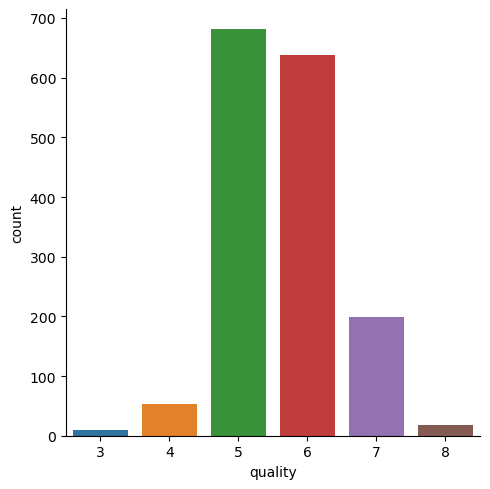

In [11]:
# number of values for each quality
sns.catplot(x = "quality", data = wine_dataset, kind = "count")

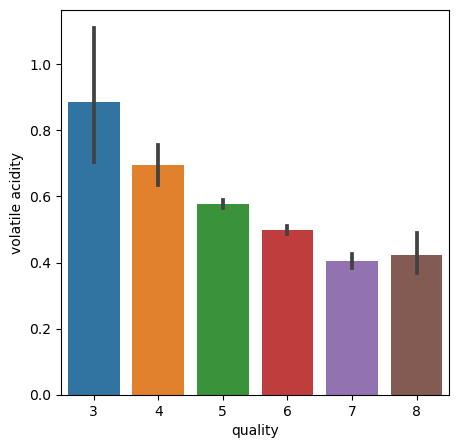

In [25]:
# volatile acidity vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "volatile acidity", data = wine_dataset)
plt.show()

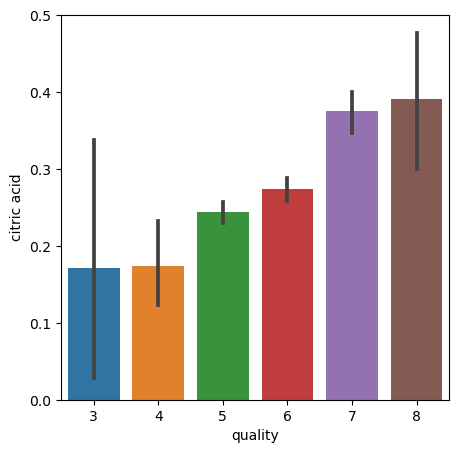

In [26]:
# citric acid vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "citric acid", data = wine_dataset)
plt.show()

In [28]:
# correlation
correlation = wine_dataset.corr()

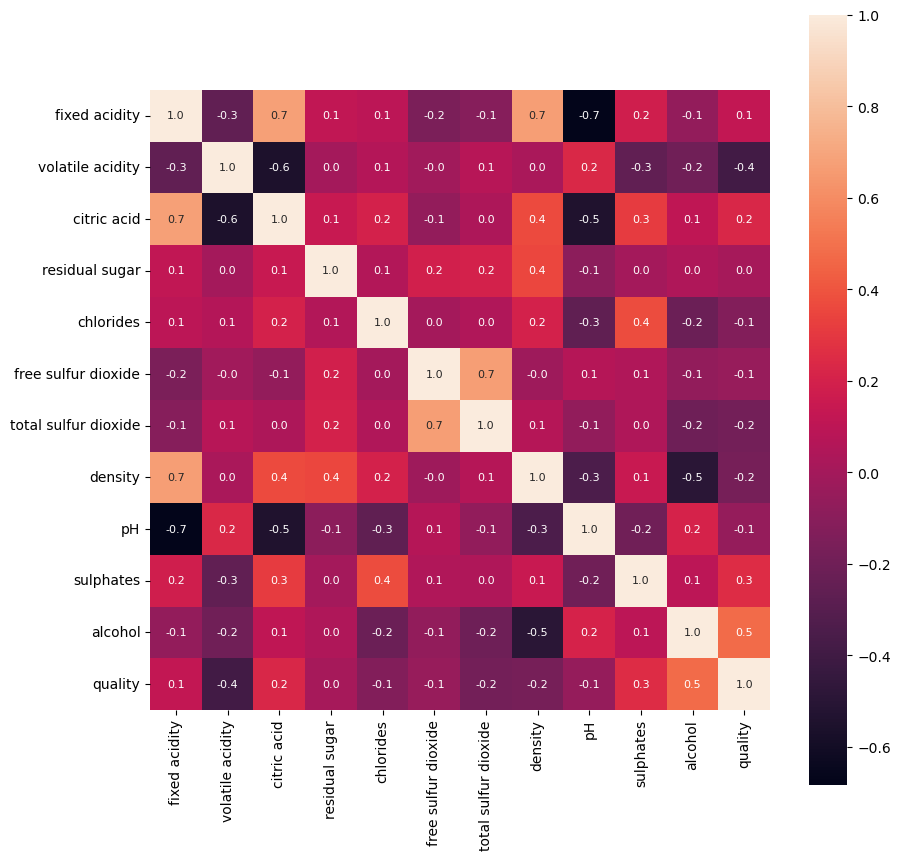

In [32]:
# heatmap for correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {"size": 8})
plt.show()

In [46]:
# separate data and label
X = wine_dataset.drop("quality", axis = 1)

In [47]:
# label binarization or label encoding
Y = wine_dataset["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [48]:
print(X)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

### Split Train and Test data

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [50]:
print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)

Total data:  (1599, 11)
Train data:  (1279, 11)
Test data:  (320, 11)


In [51]:
print(X_train)
print(Y_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1031            7.3             0.550         0.01             1.8      0.093   
1364            7.2             0.605         0.02             1.9      0.096   
649             6.7             0.420         0.27             8.6      0.068   
276             6.9             0.540         0.04             3.0      0.077   
792             7.1             0.610         0.02             2.5      0.081   
...             ...               ...          ...             ...        ...   
524             9.2             0.430         0.49             2.4      0.086   
1024            7.7             0.580         0.01             1.8      0.088   
1445            7.4             0.785         0.19             5.2      0.094   
1035           10.1             0.370         0.34             2.4      0.085   
141             8.3             0.715         0.15             1.8      0.089   

      free sulfur dioxide  

### Model Training using Random Forest

In [52]:
model = RandomForestClassifier()

In [53]:
model.fit(X_train, Y_train)

RandomForestClassifier()

### Model Evaluation

In [55]:
# accuracy score on the training data
X_train_prediciton = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediciton, Y_train)
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.9992181391712275


In [56]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy on test data: ", test_data_accuracy)

Accuracy on test data:  0.934375


### Predictive System

In [138]:
Y_test.iloc[311]

1

In [139]:
X_test.iloc[311]

fixed acidity            8.90000
volatile acidity         0.35000
citric acid              0.40000
residual sugar           3.60000
chlorides                0.11000
free sulfur dioxide     12.00000
total sulfur dioxide    24.00000
density                  0.99549
pH                       3.23000
sulphates                0.70000
alcohol                 12.00000
Name: 1008, dtype: float64

In [141]:
sample = X_test.iloc[311].values

In [142]:
print(sample)

[ 8.9      0.35     0.4      3.6      0.11    12.      24.       0.99549
  3.23     0.7     12.     ]


In [143]:
input_data = (sample)

# changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\TanveerKader\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [144]:
if(prediction[0] == 0):
    print("Poor Quality Wine.")
else:
    print("Good Quality Wine.")

Good Quality Wine.
